In [ ]:
! pip install torch torchvision
! pip install datasets
! python -m pip install -U matplotlib

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


<h1> Ch 4 - How Neural Networks Work </h1>

<h2> Exploration and Learning about Tensors </h2>

<h4>Tensors</h4>

A Tensor is the data structure that PyTorch (and most deep-learning libraries) use.

Tensors in machine learning are different from their strict mathematical definition (which are the tensors used in Physics). In fact, the study of tensor objects dates back to physical formalisms of stress forces. We will not focus too deeply on the mathematics of tensors here (this will be the subject of a different blog post). 

For the sake of our understanding at this stage, a tensor is the extension of an array to higher dimensions. Our tensors will be defined by their rank and their shape. 

**Rank** \
This gives us the "dimension" of the tensor that we are working with. 

*Note:* these definitions below are not mathematically rigorous.

Rank 0 Tensor: a scalar 
Rank 1 Tensor: a vector 
Rank 2 Tensor: a matrix 
Rank 3 Tensor: a "cube" of matrices. A way of thinking about this is that we have layers of matrices superposed to form a cube.

**Shape**\
This gives us more insight into how our tensor looks. 

A tensor with shape $N$ is a vector with n components. \
Ex: $\vec{v} = \langle v_1, v_2 \rangle $ is a tensor with shape $2$.

A tensor with shape $N \times M$ is a matrix with n rows and m columns. \
Ex: $ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ is a tensor with shape $2 \times 2$. 

A tensor with shape $N \times M \times P$ is p  $N \times M$ matrices stacked together. To represent this symbolocally, we will put matrices in a vector. \
Ex: $ T = \langle \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}, \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} , \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}  \rangle$ is a tensor with shape $ 2 \times 2 \times 3$. 

<h4> PyTorch Tensors </h4>

In [21]:
import torch

tns0 = torch.tensor(1) # --> a rank 0 tensor
tns0.shape, tns0

(torch.Size([]), tensor(1))

In [22]:
tns1 = torch.tensor([1,2]) # --> a rank 1 tensor, with shape 2
tns1.shape, tns1

(torch.Size([2]), tensor([1, 2]))

In [23]:
tns2 = torch.tensor([
    [1,2],
    [1,2]]) # --> a rank 2 tensor with shape 2 * 2
tns2.shape, tns2

(torch.Size([2, 2]),
 tensor([[1, 2],
         [1, 2]]))

In [24]:
tns3 = torch.tensor([
    [[1,2],
     [1,2]], 
            [[1,2],
             [1,2]], 
                    [[1,2],
                     [1,2]]]) # a rank 3 tensor with shape 3*2*2
tns3.shape, tns3

(torch.Size([3, 2, 2]),
 tensor([[[1, 2],
          [1, 2]],
 
         [[1, 2],
          [1, 2]],
 
         [[1, 2],
          [1, 2]]]))

<h4> Exploration of our dataset and its structure </h4>

We will be exploring our dataset that we have downloaded from the datasts API used by Hugging Face. We want to understand how a ```DatasetDict``` works. This will not be the dataset that we will use later, but this is a little too late. 

Here is the link to the dataset: [link] (https://huggingface.co/datasets/ylecun/mnist)



In [25]:
from datasets import load_dataset

ds = load_dataset("ylecun/mnist")
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [26]:
test_set = ds.get("test")

train_dict = ds.get("train")
train_dict

Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})

In [27]:
test_obj = train_dict[0]
test_obj

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
 'label': 5}

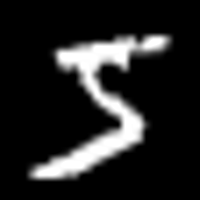

In [28]:
from PIL import Image

img = test_obj.get("image")
img.resize((200,200))

<h4> Creating a validation set </h4>

We need to split our training dataset in training and validation sets. This needs to be split randomly. We will use the ```np.random``` module from ```numpy```. We also need to transform our PIL images into PyTorch tensors. We do this by using the ```torchvision.transforms``` module. We will also normalize our data to make sure that our neural network can read each image correctly. The ```transforms.ToTensor()``` transformation makes pixels between 0 and 1. The normalized will standardize each pixel value. 

In [29]:
import torch
import torchvision.transforms as transforms
import numpy as np

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

rng = np.random.default_rng()

train_vald_imgs_arr = [item.get('image') for item in train_dict]
train_vald_lbls_arr = [item.get('label') for item in train_dict]
train_vald = list(zip(train_vald_imgs_arr, train_vald_lbls_arr))
train_vald_arr = np.array(object = train_vald, dtype = tuple)
train_vald_arr[0:4]

array([[<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x132971950>,
        5],
       [<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x132971BD0>,
        0],
       [<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x132946B10>,
        4],
       [<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x132946EA0>,
        1]], dtype=object)

In [30]:
def valid_split(arr, split = 0.2):
    rng.shuffle(arr)
    split_ix = int(split * len(arr))
    return arr[0:split_ix], arr[split_ix:-1]

training_set, validation_set = valid_split(train_vald_arr)

training_img = torch.stack([transform(img_lbl_tpl[0]) for img_lbl_tpl in training_set]).view(-1, 28*28).float().requires_grad_()
validation_img = torch.stack([transform(img_lbl_tpl[0]) for img_lbl_tpl in validation_set]).view(-1, 28*28).float().requires_grad_()

training_lbls, validation_lbls = torch.tensor([img_lbl_tpl[1] for img_lbl_tpl in training_set]), torch.tensor([img_lbl_tpl[1] for img_lbl_tpl in validation_set])

train = list(zip(training_img, training_lbls))
valid = list(zip(validation_img, validation_lbls))

In [31]:
#Checking... #FerrariCore

print(f"The type of the first element of both sets are: train'{type(train[0])}', valid'{type(valid[0])}'")
print(f"The first element of each is a tensor: train'{type(train[0][0])}', valid '{type(valid[0][0])}'")
print(f"The second element of each tuple is an integer: train '{type(train[0][1])}', valid '{type(valid[0][1])}'")
print(f"The shape of both tensors are: train '{training_img.shape}, valid '{validation_img.shape}' ")

The type of the first element of both sets are: train'<class 'tuple'>', valid'<class 'tuple'>'
The first element of each is a tensor: train'<class 'torch.Tensor'>', valid '<class 'torch.Tensor'>'
The second element of each tuple is an integer: train '<class 'torch.Tensor'>', valid '<class 'torch.Tensor'>'
The shape of both tensors are: train 'torch.Size([12000, 784]), valid 'torch.Size([47999, 784])' 


<h2> Building Up The Neural Network  </h2>

In [32]:
# Helper functions 
def init_params(size, std=1.0):
    """Initializes a random parameters for a given size of a PyTorch tensor
    
    SIZE: tuple --> gives the dimension of our tenso
    STD: float --> allows us to shift our parameters somewhat. Also needed to make sure that our parameters are floats."""
    return (torch.randn(size) * std).requires_grad_()

def first(dl):
    return next(iter(dl))

In [33]:
#Initializing weights and biases
weights = init_params((28*28,1))
bias = init_params(1)

In [34]:
#Calculating prediction for one image using a linear function
(train[0][0] * weights.T).sum() + bias

tensor([-0.7730], grad_fn=<AddBackward0>)

Since we are going to do this process with all of our tensors, we will use matrix multiplication. In python, we denote this with the symbol ```@```. 

Remember matrix multiplication rules:

For $A \times B$ to make sense, we need:

$$ A:[n \times p]$$
$$ B:[p \times m]$$

Thus, matrix $A$ needs to have the same number of columns as matrix $B$ has columns. 

In [35]:
def linear1(xb):
    """A linear function that uses matrix multiplication.
    
    XB: tensor --> our input tensor. Returns a tensor of the same rank as XB x  weights"""
    return xb@weights + bias

def mse(pred, targets):
    return torch.mean((pred-targets)**2)

preds = linear1(training_img)
preds

tensor([[ -0.7730],
        [-12.4203],
        [-15.4166],
        ...,
        [-24.7586],
        [-31.4506],
        [ -6.3199]], grad_fn=<AddBackward0>)

We will use a PyTorch ```DataLoader``` to create batches. This is because we don't want to use every image for each loss calculation. This will allow us to get a more accurate and stable gradient calculation.

In [36]:
from torch.utils.data import DataLoader 

train_dl = DataLoader(train, batch_size=256)
input, target = first(train_dl)
input.shape, target.shape

(torch.Size([256, 784]), torch.Size([256]))

In [37]:
valid_dl = DataLoader(valid, batch_size=256)

batch_img = training_img[0:4]
batch_lbls = training_lbls[0:4]

In [38]:
# How to calculate gradients with PyTorch
def calc_grad(x, target, model):
    pred = model(x)
    loss = mse(pred, target)
    loss.backward()

calc_grad(batch_img, batch_lbls, linear1)
weights.grad.mean(), bias.grad

(tensor(-0.6674), tensor([-36.5286]))

In [39]:
# Re-initialize our parameter's gradients: PyTorch adds to the last calculated gradient
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

<h4> Creating a Stochastic Gradient Descent (SGD) Optimizer </h4>

SGD helps us minimize our loss function by updating our model. We start with random parameters for our model, calculate loss with this model, calculate the gradient, update our parameters in the opposite direction of our gradient. 

*Mathematically*

Our loss function: $ \text{Loss} = L(\vec{x}) $

Our model: $ \text{Model}(I) = \text{I} \cdot \text{Weights}^T +  \text{bias} $ 

$$ \nabla L = \langle a_1, a_2, a_3, ... , a_n \rangle$$

**Stochastic Gradient Descent formula**

*Update each parameter*
$$ \text{Weights} - \nabla L$$
$$ \text{bias} - \nabla L$$

The stochastic part of the optimzer is the random initialization.

In [40]:
# linear model from pytorch modules
import torch.nn as nn

linear_model = nn.Linear(28*28,1)

w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [41]:
#Creating a SGD optimizer

class BasicOptim:
    def __init__(self, params, lr):
        self.params = list(params)
        self.lr = lr

    def step(self, *args, **kwargs):
        for p in self.params: 
            p.data -= p.grad.data * self.lr
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None

In [42]:
learning_rate = 0.1
opt = BasicOptim(linear_model.parameters(), learning_rate)

In [43]:
#simplified training loop using our optimzer
def train_epoch(model):
    for xb,yb in train_dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [44]:
validate_epoch = lambda model: "0.43"

def train_model(model, epochs: int): 
    for _ in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end = ' ')

In [45]:
train_model(linear_model, 20)

0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 

<h4> The Neural Network </h4>

The Neural Network is a layering of linear functions. We need to add a non-linearity (here the ReLU function) as a hidden layer to make sure that our subsequent layers can communicate with each other. This is also necessary for the *Universal Approximation Theorem* to hold. 

*Universal Approximation Theorem*

For any continuous function $f : [0,1]^d \rightarrow \mathbb{R}$ and any $\epsilon > 0 $, there exist a neural network with one hidden layer and a sufficient large number of hidden units $m$ which approximates $f$ on $[0,1]^d$ uniformly to within $\epsilon$. 

We will call the hidden layer is called the activation function. 

In [46]:
w1, b1, w2, b2 = init_params((28*28,30)), init_params(30), init_params((30,1)), init_params(1)

def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(torch.tensor(0.0)) # --> this is the non-linearity, the ReLU function
    res = res@w2 + b2
    return res

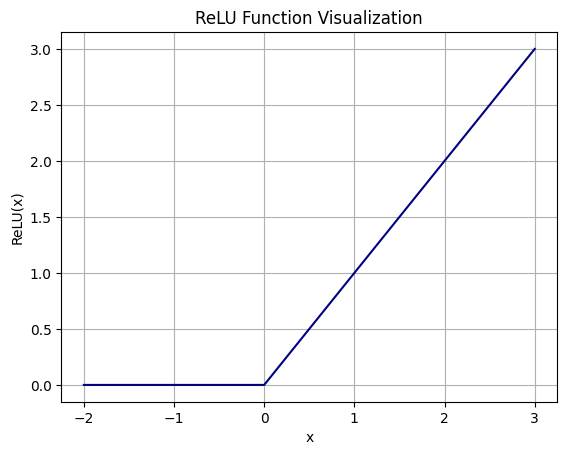

In [73]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 3, 6)
y = np.maximum(0, x)

ReLU = plt.plot(x, y)
plt.setp(ReLU, color = 'navy')
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.title("ReLU Function Visualization")
plt.grid(True)
plt.show()
plt.style.use("tableau-colorblind10")

In [48]:
#Using Pytorch modules --> preferred
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1), 
)

w1, b1, w2, b2 = simple_net.parameters()
w1.shape, b1.shape, w2.shape, b2.shape

(torch.Size([30, 784]), torch.Size([30]), torch.Size([1, 30]), torch.Size([1]))

**Important notes**

1. The output activations of w1 (the second parameter in the first linear function) needs to be the same as the input activations of w2. Here, we have 30 to make sure that our layer can construct 30 different features. We can change this number to make our model more or less complex.

2. The simple neural network is our new model. It is our objective function! 

In [49]:
#more complicated neural net example - 4 Layers

complex_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30, 30),
    nn.ReLU(),
    nn.Linear(30,1)
)

<h2> Creating Our Own Implementation of The Learner Class </h2>

In [50]:
class Learner:
    def __init__(self, dataloaders, model, optimzer, loss, metrics):
        self.train = dataloaders[0]
        self.valid = dataloaders[1]
        self.model = model
        self.opt_type = optimzer
        self.loss_fn = loss
        self.metric_fn = metrics(self.valid)

    def train_epoch(self, opt):
            epoch_loss = np.array([])
            for xb, yb in self.train:
                opt.zero_grad()
                logits = self.model(xb)
                loss = self.loss_fn(logits, yb)
                loss.backward()
                epoch_loss = np.append(epoch_loss, loss.item())
                opt.step()
            return epoch_loss
    
    def fit(self, epochs:int, learning_rate):
        validate_epoch = self.metric_fn
        opt = self.opt_type(self.model, learning_rate)
        for ep in range(epochs):
            ep_mean_loss = np.mean(self.train_epoch(opt))
            print(f"Epoch #{ep} || Accuracy: {validate_epoch(self.model)} || Epoch Mean Loss: {ep_mean_loss}")
    
    #hide
    def __repr__(self):
        return f"Learner({(self.train, self.valid)}, {self.model}, {self.optimizer}, {self.loss}, {self.metrics})"
    
    def __str__(self):
         return (f"""<Learner for {self.model}: \n  
                        Optimizer: {self.optimizer.__name__} \n
                        Loss_func: {self.loss_fn.__name__} \n
                        Metrics: {self.metric_fn}
                """)

<h2> Creating A Digit Classifier From The MNIST Dataset</h2>

For this section, I will put all of the theoretical discussion before actual code. For this task, we must define three different functions: 

1. Our model - the neural network we will use
2. Our loss function
3. Our inference function - the function that allows us to interpret the results of the neural network 

<h4> Our model </h4>

The problem we are trying to solve is creating a digit classifier. Since there are 10 digits, we want our neural network to take in an image (represented by a tensor with shape $28 \times 28$) and to output a range of values that corresponds to each possible class. Therefore, we need to output a tensor of shape $10$. This output, in the domain of the multi-class classification, is called *logits*. These are scores that our model has created for each class. Our model will display them in a vector with 10 components (our tensor with shape $10$). Each component will correspond to the raw prediction score for each digit. Therefore the logit at the index 0 will be the prediction score for the digit 0. 

<h4> Our loss function </h4>

We will be using the Cross-Entropy loss function. This loss function (also called the log loss function) is used a lot in classification models that ouput a probability value between 0 and 1. Corss-entropy loss increases as the predicted probability diverges from the actual label. 

Mathematically: 

$$ L = - \sum_{c=1}^{M} y_{o,c} \ln{(p_{o,c})} $$

1. $M$ -- the number of our classes (ex: here we would have 10)
2. $y$ -- a binary indicator (0 or 1) that tells us if the class $c$ label is the correct classification for observation $o$ is correct. 
3. $p$ -- the predicted probability that the observation is of class $c$

Let us try to visualize this function using matplotlib. 

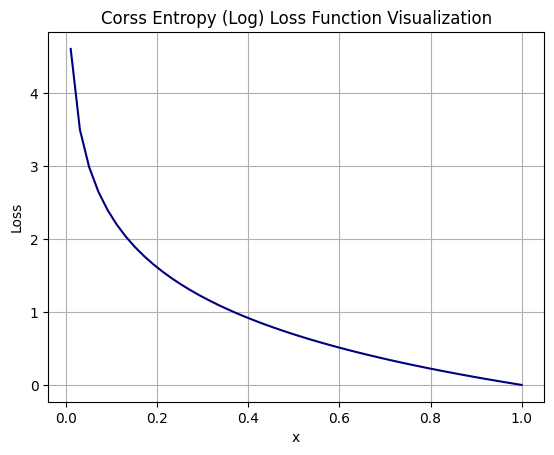

In [71]:
x = np.linspace(0.01,1.0)
y = -np.log(x)

cross_entropy = plt.plot(x,y)
plt.setp(cross_entropy, color = 'navy')
plt.xlabel("x")
plt.ylabel("Loss")
plt.title("Corss Entropy (Log) Loss Function Visualization")
plt.grid(True)
plt.show()
plt.style.use("tableau-colorblind10")

We see that we when we predict a very low probability for the right class, our loss increases very quickly (at the rate of $1/p$). This will teach our model at the right rate and allow us to get accurate predictions. 

<h4> Our inference function </h4>

Right now our model outputs logits. These are not probabilities and are not super useful for us to interpret. We need to find a way to convert our logits into a probability distribution. 

For this we will use the Softmax function. This function was first used in statistical mechanics and informaton theory. It was introduced as the Boltzman distrubtion function in the 19th century to describe the distribution of particles in thermodynamics.

**Formula** 
$$ \text{Softmax}(z_i) = \frac{ e^{z_i}}{\sum_{j=1}^M {e^{z_j}}} $$ 

1. $\bold{z_i}$ is the $ith$ component of the output vector $\vec{z}$ (here, each component is a logit from our neural network). 

2. $ \bold{e^{z_i}}$ emphasizes the difference between each logit. It also makes sure that small logits result in very small probabilities.

3. $\bold{\sum_{j=1}^M e^{z_j}}$ represents the sum of the exponentiations of each of our logits. This will be the basis of our normalization. Dividing each logit exponentiations by this sum will ensure that our softmax ouputs a probability $p$ for each $z_i$ (ie $p \epsilon (0,1)$). 

**Useful aspects of the softmax function** 
1. Point 3 is very useful as it makes sure that we get an appropriate probability.
2. If we sum all of our softmax ourputs for each logit, they sum to 1. Mathematically: 
$$ \sum_{i=1}^M \text{Softmax}(z_i) = 1$$
This means that we get an appropriate probability distribution for our class prediction probabilities. 

Using the softmax function, we can combine the outputs of our model to create a probability distribution. We then choose the highest probility as our prediction value.

<h4> Code </h4>

In [52]:
#prepare our data using the torchvision datasets
from torchvision import transforms, datasets
from torch.utils.data import Dataset, random_split, DataLoader

mnist_train = datasets.MNIST(
    root=".", train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),                
        transforms.Normalize((0.1307,), (0.3081,))  
    ])
)

mnist_test = datasets.MNIST(
    root=".", train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),                
        transforms.Normalize((0.1307,), (0.3081,))  
    ])
)

train_size = int(len(mnist_train)*0.8)
val_size = int(len(mnist_train)*0.2)

train_set, valid_set = random_split(mnist_train, [train_size, val_size])

train_dl = DataLoader(train_set, batch_size=64, shuffle=True)
valid_dl = DataLoader(valid_set, batch_size=64, shuffle=True)

test = DataLoader(mnist_test, batch_size = 10, shuffle=True)

In [53]:
#utils
def inference(xb):
    probs = torch.softmax(xb, dim=1)   
    return probs.argmax(dim=1) 

@torch.no_grad()
def metric_MNIST(xb, yb):
    preds = inference(xb)
    return (preds == yb).float().mean()

def make_metrics_fn(metrics_fn):
    def make_validate_epoch(validation_set):
        @torch.no_grad()
        def validate_epoch(model):
            accuracy = [metrics_fn(model(xb), yb) for xb,yb in validation_set]
            return round(torch.stack(accuracy).float().mean().item(), 4)
        return validate_epoch
    return make_validate_epoch

mnist_metrics = make_metrics_fn(metric_MNIST)
dataloaders = train_dl, valid_dl

In [79]:
#testing scripts
from IPython.display import display

transform_PIL = transforms.Compose([transforms.ToPILImage()])

xb, yb = next(iter(test))

def test_MNIST(model):
    for i in range(len(xb)):
        pred = inference(model(xb[i])).item()
        target = yb[i].item()
        print(f"Our model predicted for the following input this: {pred}")
        display(transform_PIL(xb[i]).resize((150,150)))
        if pred != target:
            print(f"It was actually {target} :( \n")
        else:
            print(f"Correct! It was {pred}! \n")

In [55]:
simple_net = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [56]:
def sgd(model, lr): 
    return torch.optim.SGD(model.parameters(), lr)

simple_learn = Learner(dataloaders, simple_net, sgd, nn.CrossEntropyLoss(), mnist_metrics)
simple_learn.fit(20, 0.1)

Epoch #0 || Accuracy: 0.9524 || Epoch Mean Loss: 0.28338200656572976
Epoch #1 || Accuracy: 0.9664 || Epoch Mean Loss: 0.12684618176395696
Epoch #2 || Accuracy: 0.9688 || Epoch Mean Loss: 0.0871885798505197
Epoch #3 || Accuracy: 0.9718 || Epoch Mean Loss: 0.06692528115523358
Epoch #4 || Accuracy: 0.9728 || Epoch Mean Loss: 0.05303540338886281
Epoch #5 || Accuracy: 0.974 || Epoch Mean Loss: 0.041634780219135185
Epoch #6 || Accuracy: 0.9746 || Epoch Mean Loss: 0.03470087833174815
Epoch #7 || Accuracy: 0.9758 || Epoch Mean Loss: 0.026925769412269197
Epoch #8 || Accuracy: 0.9755 || Epoch Mean Loss: 0.022359725966506327
Epoch #9 || Accuracy: 0.9758 || Epoch Mean Loss: 0.01742701446156328
Epoch #10 || Accuracy: 0.9761 || Epoch Mean Loss: 0.014651690504513681
Epoch #11 || Accuracy: 0.9776 || Epoch Mean Loss: 0.011901324820394318
Epoch #12 || Accuracy: 0.9766 || Epoch Mean Loss: 0.009739438372819374
Epoch #13 || Accuracy: 0.9773 || Epoch Mean Loss: 0.007814280425120767
Epoch #14 || Accuracy: 0.

Our model predicted for the following input this: 5


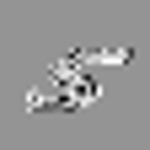

Correct! It was 5! 

Our model predicted for the following input this: 0


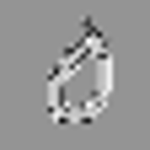

Correct! It was 0! 

Our model predicted for the following input this: 6


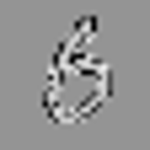

Correct! It was 6! 

Our model predicted for the following input this: 3


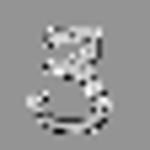

Correct! It was 3! 

Our model predicted for the following input this: 2


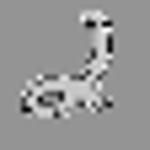

Correct! It was 2! 

Our model predicted for the following input this: 6


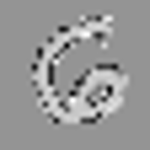

Correct! It was 6! 

Our model predicted for the following input this: 3


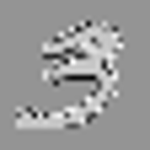

Correct! It was 3! 

Our model predicted for the following input this: 2


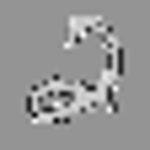

Correct! It was 2! 

Our model predicted for the following input this: 4


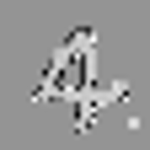

Correct! It was 4! 

Our model predicted for the following input this: 7


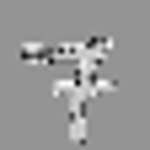

Correct! It was 7! 



In [80]:
test_MNIST(simple_net)

<h4> Trying this on a more complex neural network (4 layers) </h4>

In [58]:
complex_net = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 256),
    nn.ReLU(),
    nn.Linear(256,10)
)

In [75]:
complex_learn = Learner(dataloaders, complex_net, sgd, nn.CrossEntropyLoss(), mnist_metrics)
complex_learn.fit(20, 0.1)

Epoch #0 || Accuracy: 0.9547 || Epoch Mean Loss: 0.3226238980094592
Epoch #1 || Accuracy: 0.965 || Epoch Mean Loss: 0.12212716623395681
Epoch #2 || Accuracy: 0.9666 || Epoch Mean Loss: 0.08247767006667951
Epoch #3 || Accuracy: 0.9727 || Epoch Mean Loss: 0.061977105421945455
Epoch #4 || Accuracy: 0.974 || Epoch Mean Loss: 0.046655442216433585
Epoch #5 || Accuracy: 0.9737 || Epoch Mean Loss: 0.03490441683772951
Epoch #6 || Accuracy: 0.9751 || Epoch Mean Loss: 0.026278750751633197
Epoch #7 || Accuracy: 0.9702 || Epoch Mean Loss: 0.01987650533602573
Epoch #8 || Accuracy: 0.9772 || Epoch Mean Loss: 0.014694855815459353
Epoch #9 || Accuracy: 0.9762 || Epoch Mean Loss: 0.010513619389404387
Epoch #10 || Accuracy: 0.9777 || Epoch Mean Loss: 0.008572090015736953
Epoch #11 || Accuracy: 0.9784 || Epoch Mean Loss: 0.006331878423050511
Epoch #12 || Accuracy: 0.9788 || Epoch Mean Loss: 0.004126554309244966
Epoch #13 || Accuracy: 0.9786 || Epoch Mean Loss: 0.0026409956792776937
Epoch #14 || Accuracy: 

Our model predicted for the following input this: 5


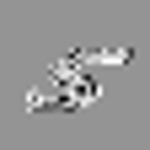

Correct! It was 5! 

Our model predicted for the following input this: 0


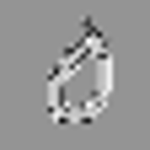

Correct! It was 0! 

Our model predicted for the following input this: 6


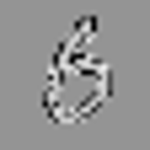

Correct! It was 6! 

Our model predicted for the following input this: 3


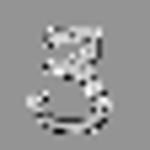

Correct! It was 3! 

Our model predicted for the following input this: 2


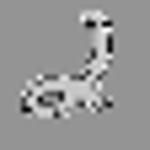

Correct! It was 2! 

Our model predicted for the following input this: 6


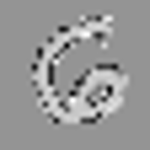

Correct! It was 6! 

Our model predicted for the following input this: 3


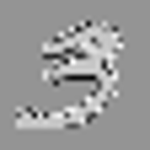

Correct! It was 3! 

Our model predicted for the following input this: 2


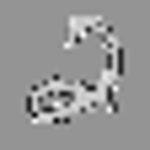

Correct! It was 2! 

Our model predicted for the following input this: 4


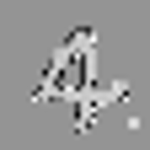

Correct! It was 4! 

Our model predicted for the following input this: 7


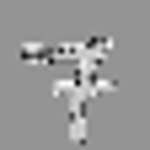

Correct! It was 7! 



In [81]:
test_MNIST(complex_net)